# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gym: https://github.com/openai/gym 

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

# Implementation of the Windy GridWorld environment in Example 6.5

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
"""Windy GridWorld Env"""
class WindyGridWorld(object):
    def __init__(self, enable_king_move=False, enable_no_move=False):
        """
        Args:
            enable_king_move (bool): If True, using King's movement. Otherwise, using the original action space.
            enable_no_move (bool): If True, adding no movement under the condition of enable_king_move = True.
        
        Note: for different setup, we have the following action spaces:
            - Original: ["up", "down", "left", "right"];
            - King's move: ["up", "down", "left", "right", "up-left", "up-right", "down-left", "down-right"];
            - King's move + no move: ["up", "down", "left", "right", "up-left", "up-right", "down-left", "down-right", "stay"]
        """
        
        # define the grid space
        self.grid = np.zeros((7, 10))

        # define the state space
        self.state_space = [[r, c] for r, c in zip(np.where(self.grid == 0.0)[0],
                                                   np.where(self.grid == 0.0)[1])]

        # define the start state
        self.start_state = [3, 0]

        # define the goal state
        self.goal_state = [3, 7]

        # define the wind
        self.wind = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0], dtype=int)

        # define the action space
        if enable_king_move:
            # add King's move actions
            if enable_no_move:
                self.action_space = {
                    "up": np.array([-1, 0]),
                    "down": np.array([1, 0]),
                    "left": np.array([0, -1]),
                    "right": np.array([0, 1]),
                    "up-right": np.array([-1, 1]),  # add up-right
                    "up-left": np.array([-1, -1]),  # add up-left
                    "down-right": np.array([1, 1]),  # add down-right
                    "down-left": np.array([1, -1]),  # add down-left
                    "stay": np.array([0, 0])  # add no move action
                }
            else:
                # add King's move actions + one no movement action
                self.action_space = {
                    "up": np.array([-1, 0]),
                    "down": np.array([1, 0]),
                    "left": np.array([0, -1]),
                    "right": np.array([0, 1]),
                    "up-right": np.array([-1, 1]),  # add up-right
                    "up-left": np.array([-1, -1]),  # add up-left
                    "down-right": np.array([1, 1]),  # add down-right
                    "down-left": np.array([1, -1])  # add down-left
                }
        else:
            # normal actions
            self.action_space = {
                "up": np.array([-1, 0]),
                "down": np.array([1, 0]),
                "left": np.array([0, -1]),
                "right": np.array([0, 1])
            }

        # track the current state, time step, and action
        self.state = None
        self.t = None
        self.act = None

    def reset(self):
        # reset the agent to the start state
        self.state = self.start_state
        # reset the time step tracker
        self.t = 0
        # reset the action tracker
        self.act = None
        # reset the terminal flag
        terminated = False
        return self.state, terminated

    def step(self, act):
        """
        Args:
            act (string): a string variable indicating the action.
        """
        # obtain the state array
        s_arr = np.array(self.state)

        # obtain the action array
        act_arr = self.action_space[act.lower()]

        # obtain the wind array
        wind_arr = -1 * np.array([self.wind[self.state[1]], 0], dtype=int)

        # compute the next state
        next_s_arr = np.clip(s_arr + act_arr + wind_arr,
                             a_min=np.array([0, 0]),
                             a_max=np.array([self.grid.shape[0]-1, self.grid.shape[1]-1]))

        # compute the reward
        reward = 0 if next_s_arr.tolist() == self.goal_state else -1

        # check the termination
        terminated = True if reward == 0 else False

        # update the tracking variables
        self.state = next_s_arr.tolist()
        self.t += 1
        self.act = act

        return self.state, reward, terminated

    def render(self):
        # plot the agent and the goal
        # agent = 1
        # goal = 2
        plot_arr = self.grid.copy()
        plot_arr[self.state[0], self.state[1]] = 1.0
        plot_arr[self.goal_state[0], self.goal_state[1]] = 2.0
        plt.clf()
        fig, arr = plt.subplots(1, 1)
        arr.set_title(f"state={self.state}, act={self.act}")
        arr.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(1)
        plt.close(fig)

In [3]:
"""Plot function similar to Ex1"""
def plot_curves(arr_list, legend_list, color_list, ylabel, xlabel, fig_title):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.set_title(f"{fig_title}")
    ax.legend(handles=h_list)
    plt.show()

# Test Windy GridWorld 

In [4]:
# check whether enable King's movement and no movement
use_king_move = False
use_no_move = False

# create the environment
env = WindyGridWorld(enable_king_move=use_king_move,
                     enable_no_move=use_no_move)
s, d = env.reset()

# iteracting with the environment for 10 time steps using a random policy
for t in range(10): 
    # sample an random action
    a = np.random.choice(list(env.action_space.keys()), 1)[0]
    
    # interact with the envrionment
    next_s, r, d = env.step(a)
    
    # print info
    print(f"t = {t}: state = {s}, action = {a},  reward = {r}, next_state = {next_s}, done = {d}")
    
    # check termination
    if d:
        s, d = env.reset()

t = 0: state = [3, 0], action = up,  reward = -1, next_state = [2, 0], done = False
t = 1: state = [3, 0], action = down,  reward = -1, next_state = [3, 0], done = False
t = 2: state = [3, 0], action = down,  reward = -1, next_state = [4, 0], done = False
t = 3: state = [3, 0], action = up,  reward = -1, next_state = [3, 0], done = False
t = 4: state = [3, 0], action = down,  reward = -1, next_state = [4, 0], done = False
t = 5: state = [3, 0], action = down,  reward = -1, next_state = [5, 0], done = False
t = 6: state = [3, 0], action = left,  reward = -1, next_state = [5, 0], done = False
t = 7: state = [3, 0], action = down,  reward = -1, next_state = [6, 0], done = False
t = 8: state = [3, 0], action = down,  reward = -1, next_state = [6, 0], done = False
t = 9: state = [3, 0], action = right,  reward = -1, next_state = [6, 1], done = False


# Q4 - (a): Solve the Windy Gridworld using the following algorithms and reproduce the figure similar to the figure in Example 6.5

- Implement the SARSA, Expected SARSA, and Q learning.
- Reproduce the plot in the Example 6.5 and plot the three curves in a single plot. You can use the provided plotting code.

In [5]:
""" CODE HERE YOUR IMPLEMENTATION for SARSA """
#Return Epsilon Greedy Action based on current state
def EpsilonGreedySelector(Epsilon, Qval, state):
    actionSpace = list(env.action_space.keys())
    currentState = state
    Qvals = []
    for i in range(len(actionSpace)):
        Qvals.append(Qval[currentState[0],currentState[1],i])
    bestIndex = [index for index,value in enumerate(Qvals) if value == max(Qvals)]
    bestAction = actionSpace[random.choice(bestIndex)]
    # bestIndex = Qvals.index(max(Qvals))
    # bestAction = actionSpace[bestIndex]
    if random.random() < (1 - Epsilon):
        return bestAction
    else:
        actionSpace.remove(bestAction)
        return random.choice(actionSpace)

def WGSarsa(NumEpisodes, Alpha, Epsilon, king_move, no_move):
    
    #Initialize environment
    if king_move == True and no_move == False:
        env = WindyGridWorld(enable_king_move = True, enable_no_move = False)
    elif king_move == True and no_move == True:
        env = WindyGridWorld(enable_king_move = True, enable_no_move = True)
    else:
        env = WindyGridWorld(enable_king_move = False, enable_no_move = False)
    
    #Initiating Q & action space for indexing
    action_space = list(env.action_space.keys())
    numActions = len(action_space)
    Qval = np.zeros((7,10,numActions))

    NumOfEpisodes = []
    Performance = []
    steps = 0
    Episodes = 0

    for episode in range(int(NumEpisodes)):
        
        #Initialize S
        env.reset()
        state = env.state

        #Choose action using epislon greedy policy
        action = EpsilonGreedySelector(Epsilon, Qval, state)
        rewards = 0
        while True:
            
            #Take action A
            next_state, reward, TerminationCondition = env.step(action)
            
            #Next action
            next_action = EpsilonGreedySelector(Epsilon, Qval, next_state)

            #update
            actionIndex = action_space.index(action)
            nextActionIndex = action_space.index(next_action)
            tdError = reward + Qval[next_state[0], next_state[1], nextActionIndex] - Qval[state[0],state[1],actionIndex]
            Qval[state[0],state[1],actionIndex] += (Alpha * tdError)

            state = next_state
            action = next_action

            if TerminationCondition == True:
                break

            steps += 1
            NumOfEpisodes.append(Episodes)
            rewards += reward

            #Limiting max number of steps so we can average the results
            if steps == 8000:
                break

        Episodes += 1
        Performance.append(rewards)
        #Limiting max number of steps so we can average the results
        if steps == 8000:
            break
    return NumOfEpisodes, Performance

def WGSarsaTrials(NumOfTrials, NumEpisodes, Alpha, Epsilon, king_move, no_move):
    NumEps = []
    PerfEps = []
    for trial in range(NumOfTrials):
        Eps, Perf = WGSarsa(NumEpisodes, Alpha, Epsilon, king_move, no_move)
        NumEps.append(Eps)
        PerfEps.append(Perf)

    return NumEps, PerfEps
  

EpCounterSarsa, _ = WGSarsaTrials(10, 300, 0.5, 0.1, False, False)
_, PerfSarsa = WGSarsaTrials(10, 100, 0.5, 0.1, False, False)
        


In [6]:
""" CODE HERE YOUR IMPLEMENTATION for Expected SARSA """
#Return Epsilon Greedy Action based on current state
def EpsilonGreedySelector(Epsilon, Qval, state):
    actionSpace = list(env.action_space.keys())
    currentState = state
    Qvals = []
    for i in range(len(actionSpace)):
        Qvals.append(Qval[currentState[0],currentState[1],i])
    bestIndex = [index for index,value in enumerate(Qvals) if value == max(Qvals)]
    bestAction = actionSpace[random.choice(bestIndex)]

    if random.random() < (1 - Epsilon):
        return bestAction
    else:
        actionSpace.remove(bestAction)
        return random.choice(actionSpace)

#Return expected value of next state
def Expected(Epsilon, Qval, Nextstate):
    actionSpace = list(env.action_space.keys())
    bestAction = EpsilonGreedySelector(Epsilon, Qval, Nextstate)
    bestIndex = actionSpace.index(bestAction)
    state = Nextstate
    ExpectedValue = 0
    for i in range(len(actionSpace)):
        if i != bestIndex:
            ExpectedValue += ((Epsilon / len(actionSpace)) * Qval[state[0],state[1],i])
        else:
            ExpectedValue += ((1 - Epsilon + (Epsilon / len(actionSpace))) * Qval[state[0],state[1],i])
    return ExpectedValue

def WGSarsaExpected(NumEpisodes, Alpha, Epsilon, king_move, no_move):

    #Initialize environment
    if king_move == True and no_move == False:
        env = WindyGridWorld(enable_king_move = True, enable_no_move = False)
    elif king_move == True and no_move == True:
        env = WindyGridWorld(enable_king_move = True, enable_no_move = True)
    else:
        env = WindyGridWorld(enable_king_move = False, enable_no_move = False)
    
    #Initiating Q & action space for indexing
    action_space = list(env.action_space.keys())
    numActions = len(action_space)
    Qval = np.zeros((7,10,numActions))

    NumOfEpisodes = []
    Performance = []
    steps = 0
    Episodes = 0

    for episode in range(int(NumEpisodes)):
        
        #Initialize S
        env.reset()
        state = env.state
        rewards = 0
        while True:

            #Choose A
            action = EpsilonGreedySelector(Epsilon, Qval, state)

            #Take action A
            next_state, reward, TerminationCondition = env.step(action)

            #update
            actionIndex = action_space.index(action)
            expectedval = Expected(Epsilon, Qval, next_state)
            tdError = reward + expectedval - Qval[state[0],state[1],actionIndex]
            Qval[state[0],state[1],actionIndex] += (Alpha * tdError)

            state = next_state

            if TerminationCondition == True:
                break

            steps += 1
            NumOfEpisodes.append(Episodes)
            rewards += reward

            #Limiting max number of steps so we can average the results
            if steps == 8000:
                break

        Episodes += 1
        Performance.append(rewards)
        #Limiting max number of steps so we can average the results
        if steps == 8000:
            break
    return NumOfEpisodes, Performance

def WGSarsaExpectedTrials(NumOfTrials, NumEpisodes, Alpha, Epsilon, king_move, no_move):
    NumEps = []
    PerfEps = []
    for trial in range(NumOfTrials):
        Eps, Perf = WGSarsaExpected(NumEpisodes, Alpha, Epsilon, king_move, no_move)
        NumEps.append(Eps)
        PerfEps.append(Perf)

    return NumEps, PerfEps

EpCounterSarsaExpected, _ = WGSarsaExpectedTrials(10, 300, 0.5, 0.1, False, False) 
_, PerfSarsaExpected = WGSarsaExpectedTrials(10, 100, 0.5, 0.1, False, False)

In [7]:
""" CODE HERE YOUR IMPLEMENTATION for Q learning """
#Return Epsilon Greedy Action based on current state
def EpsilonGreedySelector(Epsilon, Qval, state):
    actionSpace = list(env.action_space.keys())
    currentState = state
    Qvals = []
    for i in range(len(actionSpace)):
        Qvals.append(Qval[currentState[0],currentState[1],i])
    bestIndex = [index for index,value in enumerate(Qvals) if value == max(Qvals)]
    bestAction = actionSpace[random.choice(bestIndex)]

    if random.random() < (1 - Epsilon):
        return bestAction
    else:
        actionSpace.remove(bestAction)
        return random.choice(actionSpace)

#Maximizing action based on nextState
def GreedySelector(Qval, Nextstate):
    actionSpace = list(env.action_space.keys())
    state = Nextstate
    Qvals = []
    for i in range(len(actionSpace)):
        Qvals.append(Qval[state[0],state[1],i])
    bestIndex = [index for index,value in enumerate(Qvals) if value == max(Qvals)]
    bestAction = actionSpace[random.choice(bestIndex)]
    return bestAction

def WGQLearn(NumEpisodes, Alpha, Epsilon, king_move, no_move):

    #Initialize environment
    if king_move == True and no_move == False:
        env = WindyGridWorld(enable_king_move = True, enable_no_move = False)
    elif king_move == True and no_move == True:
        env = WindyGridWorld(enable_king_move = True, enable_no_move = True)
    else:
        env = WindyGridWorld(enable_king_move = False, enable_no_move = False)
    
    #Initiating Q & action space for indexing
    action_space = list(env.action_space.keys())
    numActions = len(action_space)
    Qval = np.zeros((7,10,numActions))

    NumOfEpisodes = []
    Performance = []
    steps = 0
    Episodes = 0

    for episode in range(int(NumEpisodes)):
        
        #Initialize S
        env.reset()
        state = env.state
        rewards = 0
        while True:

            #Choose A
            action = EpsilonGreedySelector(Epsilon, Qval, state)

            #Take action A
            next_state, reward, TerminationCondition = env.step(action)

            #update
            actionIndex = action_space.index(action)
            next_action = GreedySelector(Qval, next_state)
            maxActionIndex = action_space.index(next_action)
            tdError = reward + Qval[next_state[0], next_state[1], maxActionIndex] - Qval[state[0],state[1],actionIndex]
            Qval[state[0],state[1],actionIndex] += (Alpha * tdError)

            state = next_state

            if TerminationCondition == True:
                break

            steps += 1
            NumOfEpisodes.append(Episodes)
            rewards += reward

            #Limiting max number of steps so we can average the results
            if steps == 8000:
                break

        Episodes += 1
        Performance.append(rewards)
        #Limiting max number of steps so we can average the results
        if steps == 8000:
            break
    return NumOfEpisodes, Performance

def WGQLearnTrials(NumOfTrials, NumEpisodes, Alpha, Epsilon, king_move, no_move):
    NumEps = []
    PerfEps = []
    for trial in range(NumOfTrials):
        Eps, Perf = WGQLearn(NumEpisodes, Alpha, Epsilon, king_move, no_move)
        NumEps.append(Eps)
        PerfEps.append(Perf)

    return NumEps, PerfEps

EpCounterQLearn, _ = WGQLearnTrials(10, 300, 0.5, 0.1, False, False) 
_, PerfQLearn = WGQLearnTrials(10, 100, 0.5, 0.1, False, False)





<Figure size 640x480 with 0 Axes>

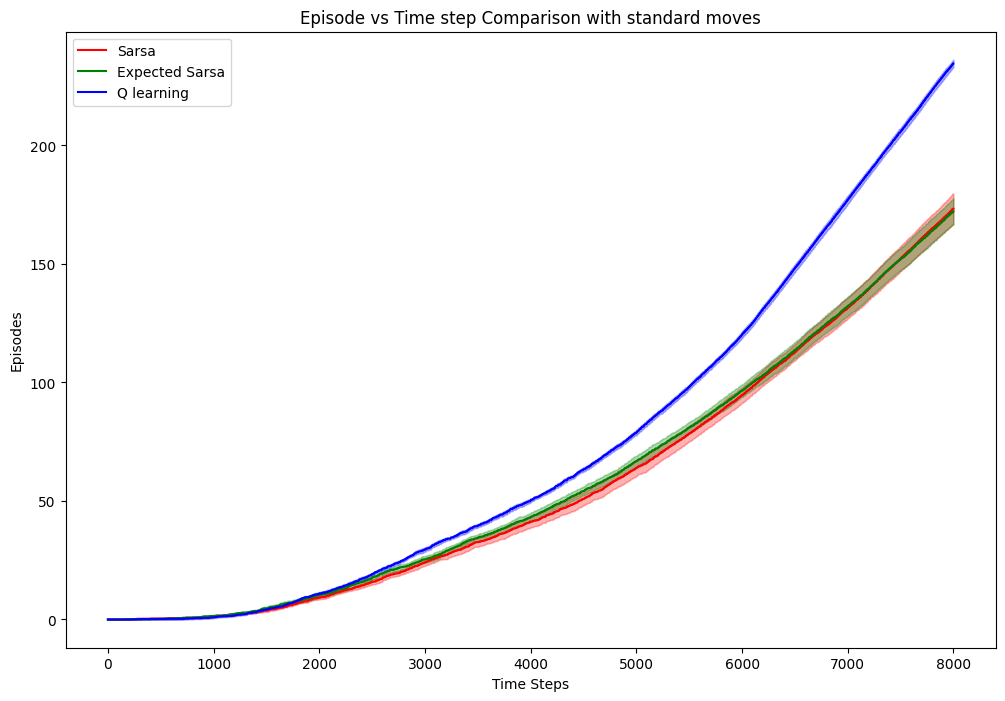

<Figure size 640x480 with 0 Axes>

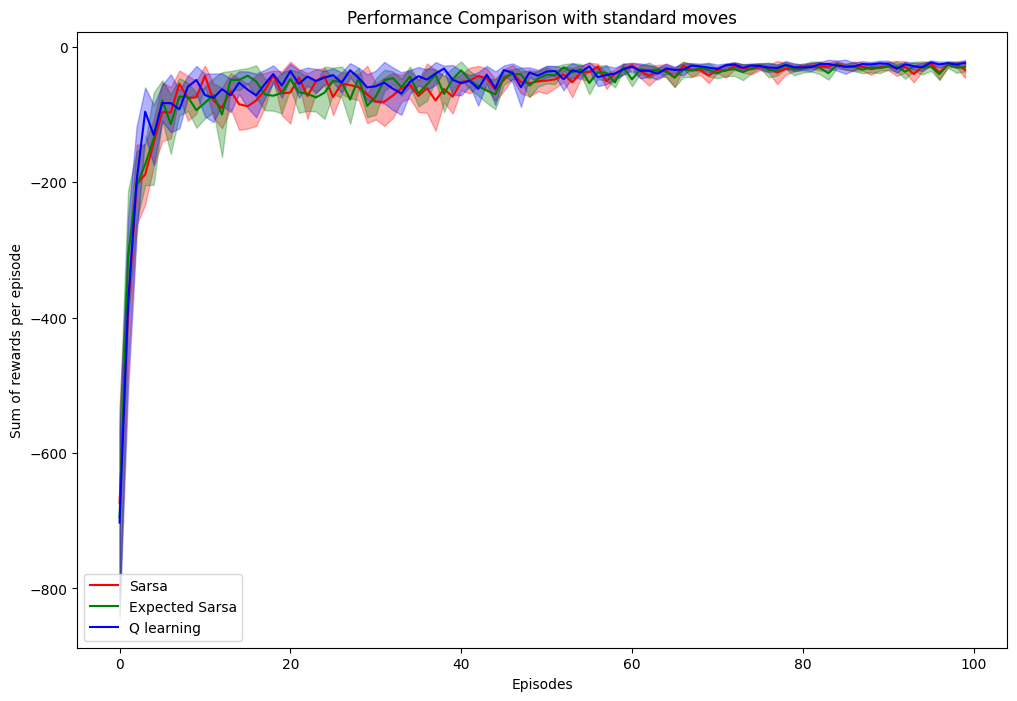

In [8]:
""" CODE HERE YOUR IMPLEMENTATION OF FIGURE PLOTTING """

# plot_curves(np.array([EpCounterSarsa]), ['Sarsa'], ['r'], 'Episodes', 'Episode vs Time Step, Sarsa')
# plot_curves(np.array([EpCounterSarsaExpected]), ['Expected Sarsa'], ['g'], 'Episodes', 'Episode vs Time Step, Expected Sarsa')
# plot_curves(np.array([EpCounterQLearn]), ['Q Learning'], ['b'], 'Episodes', 'Episode vs Time Step, Q Learning')

# #perf curves
# plot_curves(np.array([PerfSarsa]), ['Sarsa'], ['r'], 'Episodes', 'Performance, Sarsa')
# plot_curves(np.array([PerfSarsaExpected]), ['Expected Sarsa'], ['g'], 'Episodes', 'Performance, Expected Sarsa')
# plot_curves(np.array([PerfQLearn]), ['Q Learning'], ['b'], 'Episodes', 'Performance, Q Learning')

Perf = [np.array(PerfSarsa), np.array(PerfSarsaExpected), np.array(PerfQLearn)]
CounterList = [np.array(EpCounterSarsa), np.array(EpCounterSarsaExpected), np.array(EpCounterQLearn)]
NameList = ['Sarsa', 'Expected Sarsa', 'Q learning']
Colors = ['r','g','b']

plot_curves(CounterList, NameList, Colors, 'Episodes', "Time Steps", "Episode vs Time step Comparison with standard moves")
plot_curves(Perf, NameList, Colors, 'Sum of rewards per episode', 'Episodes', 'Performance Comparison with standard moves')






# Q4 - (b): Re-solve the Windy GridWorld with Kings' movement and No movement.

<Figure size 640x480 with 0 Axes>

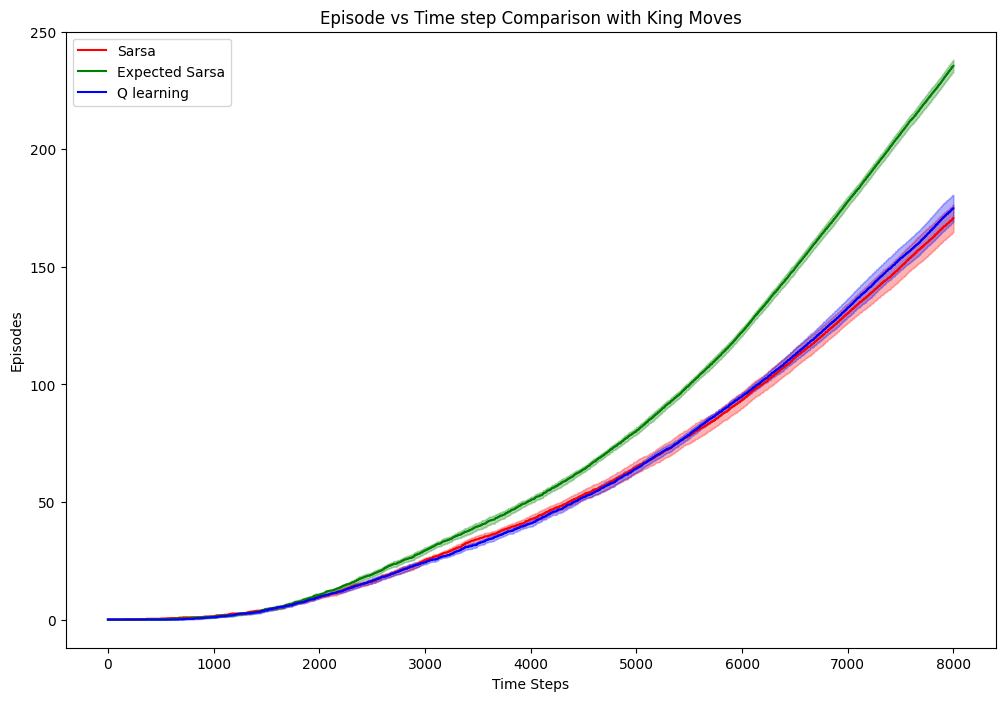

<Figure size 640x480 with 0 Axes>

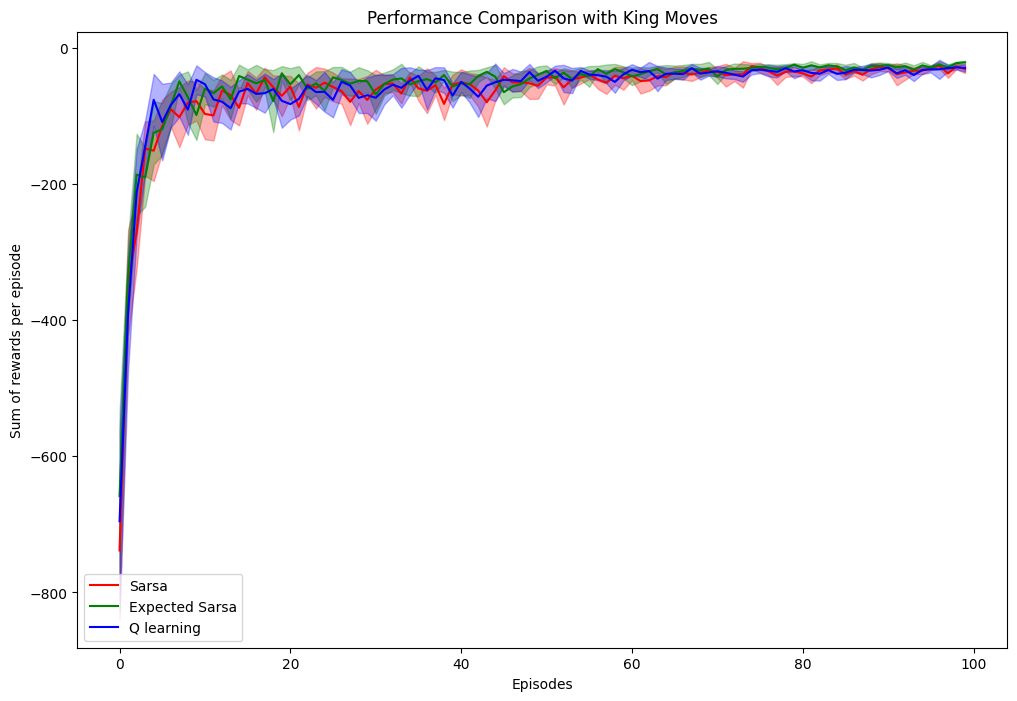

In [9]:
""" Reproduce the Figure above in Windy GridWorld with King's movement """
EpCounterSarsaKing, _ = WGSarsaTrials(10, 300, 0.5, 0.1, True, False)
EpCounterQLearnKing, _ = WGQLearnTrials(10, 300, 0.5, 0.1, True, False) 
EpCounterSarsaExpectedKing, _ = WGSarsaExpectedTrials(10, 300, 0.5, 0.1, True, False) 
_, PerfSarsaKing = WGSarsaTrials(10, 100, 0.5, 0.1, True, False)
_, PerfQLearnKing = WGQLearnTrials(10, 100, 0.5, 0.1, True, False) 
_, PerfSarsaExpectedKing = WGSarsaExpectedTrials(10, 100, 0.5, 0.1, True, False) 

Perf = [np.array(PerfSarsaKing), np.array(PerfQLearnKing), np.array(PerfSarsaExpectedKing)]
CounterList = [np.array(EpCounterSarsaKing), np.array(EpCounterQLearnKing), np.array(EpCounterSarsaExpectedKing)]
NameList = ['Sarsa', 'Expected Sarsa', 'Q learning']
Colors = ['r','g','b']

plot_curves(CounterList, NameList, Colors, 'Episodes', "Time Steps", "Episode vs Time step Comparison with King Moves")
plot_curves(Perf, NameList, Colors, 'Sum of rewards per episode', 'Episodes', 'Performance Comparison with King Moves')


<Figure size 640x480 with 0 Axes>

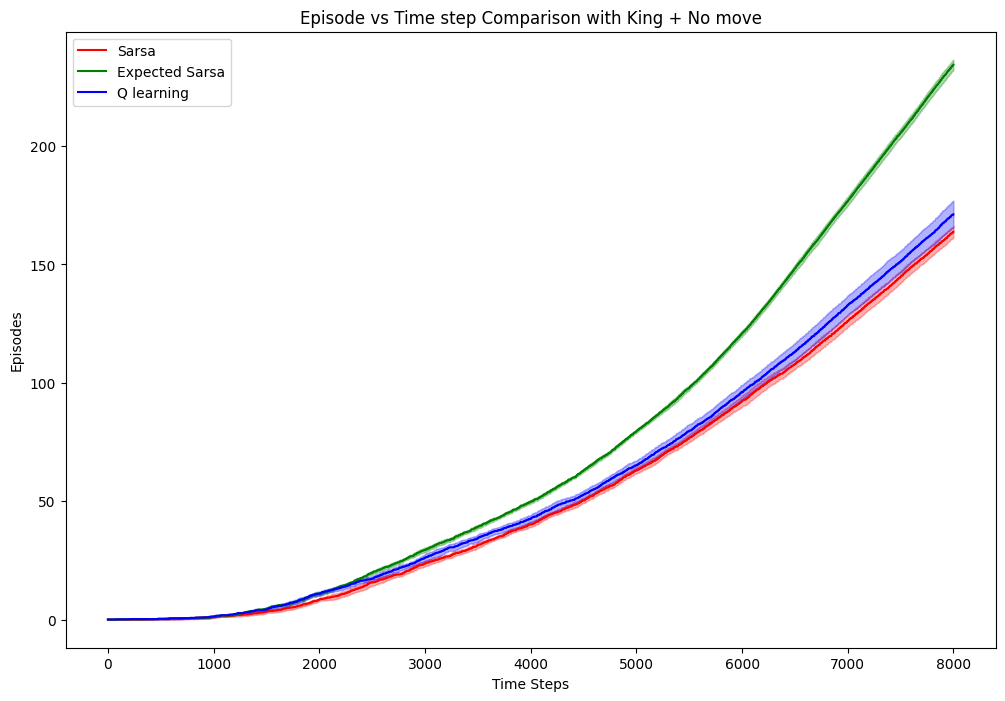

<Figure size 640x480 with 0 Axes>

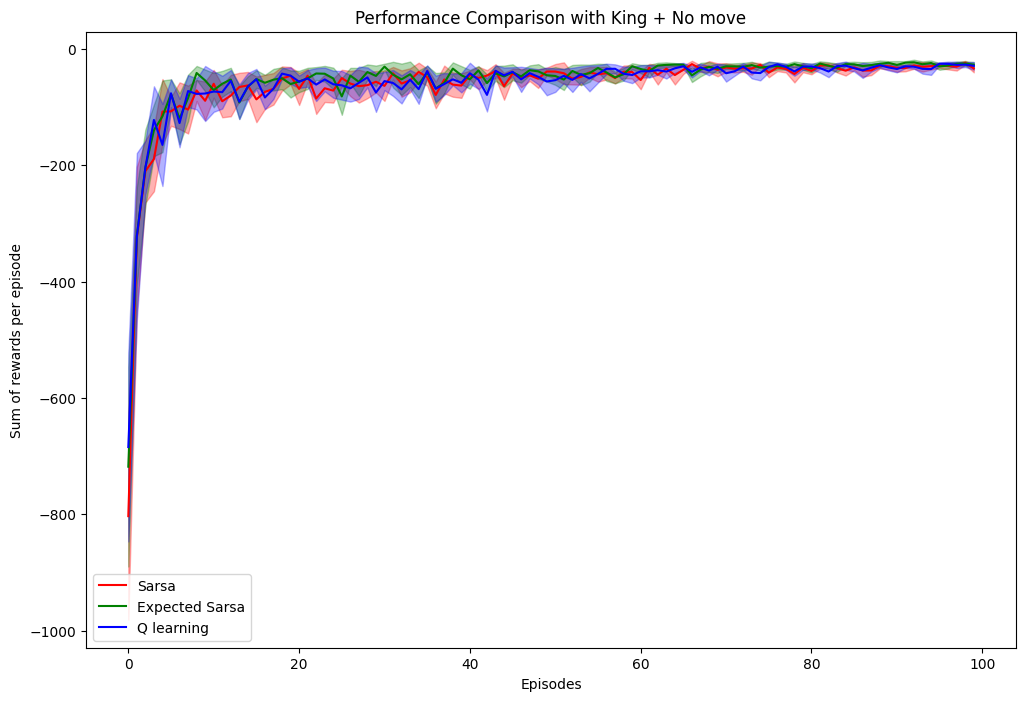

In [10]:
""" Reproduce the Figure above in Windy GridWorld with King's movement + no movement """
EpCounterSarsaNoMove, _ = WGSarsaTrials(10, 300, 0.5, 0.1, True, True)
EpCounterQLearnNoMove, _ = WGQLearnTrials(10, 300, 0.5, 0.1, True, True) 
EpCounterSarsaExpectedNoMove, _ = WGSarsaExpectedTrials(10, 300, 0.5, 0.1, True, True) 
_, PerfSarsaNoMove = WGSarsaTrials(10, 100, 0.5, 0.1, True, True)
_, PerfQLearnNoMove = WGQLearnTrials(10, 100, 0.5, 0.1, True, True) 
_, PerfSarsaExpectedNoMove = WGSarsaExpectedTrials(10, 100, 0.5, 0.1, True, True) 

Perf = [np.array(PerfSarsaNoMove), np.array(PerfQLearnNoMove), np.array(PerfSarsaExpectedNoMove)]
CounterList = [np.array(EpCounterSarsaNoMove), np.array(EpCounterQLearnNoMove), np.array(EpCounterSarsaExpectedNoMove)]
NameList = ['Sarsa', 'Expected Sarsa', 'Q learning']
Colors = ['r','g','b']

plot_curves(CounterList, NameList, Colors, 'Episodes', "Time Steps", "Episode vs Time step Comparison with King + No move")
plot_curves(Perf, NameList, Colors, 'Sum of rewards per episode', 'Episodes', 'Performance Comparison with King + No move')

# Q5: Bias-variance trade-off

In [11]:
""" Please code your implementation of running the experiments here """

#Generating the near-optimal policy

#Return Epsilon Greedy Action based on current state
def EpsilonGreedySelector(Epsilon, Qval, state):
    actionSpace = list(env.action_space.keys())
    currentState = state
    Qvals = []
    for i in range(len(actionSpace)):
        Qvals.append(Qval[currentState[0],currentState[1],i])
    bestIndex = [index for index,value in enumerate(Qvals) if value == max(Qvals)]
    bestAction = actionSpace[random.choice(bestIndex)]
    # bestIndex = Qvals.index(max(Qvals))
    # bestAction = actionSpace[bestIndex]
    if random.random() < (1 - Epsilon):
        return bestAction
    else:
        actionSpace.remove(bestAction)
        return random.choice(actionSpace)

def WGSarsaQval(NumEpisodes, Alpha, Epsilon):
    
    #Initialize environment
    env = WindyGridWorld()
    
    #Initiating Q & action space for indexing
    action_space = list(env.action_space.keys())
    numActions = len(action_space)
    Qval = np.zeros((7,10,numActions))

    for episode in range(int(NumEpisodes)):
        
        #Initialize S
        env.reset()
        state = env.state

        #Choose action using epislon greedy policy
        action = EpsilonGreedySelector(Epsilon, Qval, state)
        rewards = 0
        while True:
            
            #Take action A
            next_state, reward, TerminationCondition = env.step(action)
            
            #Next action
            next_action = EpsilonGreedySelector(Epsilon, Qval, next_state)

            #update
            actionIndex = action_space.index(action)
            nextActionIndex = action_space.index(next_action)
            tdError = reward + Qval[next_state[0], next_state[1], nextActionIndex] - Qval[state[0],state[1],actionIndex]
            Qval[state[0],state[1],actionIndex] += (Alpha * tdError)

            state = next_state
            action = next_action

            if TerminationCondition == True:
                break

    return Qval

#Generating the episodes

def epGreedyChoice(Epsilon, action):
    actionSpace = list(env.action_space.keys())
    actionSpace.remove(action)
    if random.random() <= (1 - Epsilon):
        return action
    else:
        return random.choice(actionSpace)

def episodeGenerator(Epsilon, Qvalues, NumOfEpisodes):

    #Initialize environment
    env = WindyGridWorld()
    env.reset()
    actionSpace = list(env.action_space.keys())
    state = env.state

    TotalepisodeSAR = []
    x, y, z = Qvalues.shape
    Policy = np.zeros((x,y), dtype = object)
    for i in range(x):
        for j in range(y):
            Qs = []
            for k in range(z):
                Qs.append(Qvalues[i,j,k])
                # bestIndex = [index for index,value in enumerate(Qvals) if value == max(Qvals)]
                # bestAction = actionSpace[random.choice(bestIndex)]
            bestIndex = Qs.index(max(Qs))
            bestAction = actionSpace[bestIndex]
            Policy[i,j] = bestAction

    for ep in range(int(NumOfEpisodes)):
        
        EpisodeStory = []

        while True:
            action = epGreedyChoice(Epsilon, Policy[state[0],state[1]])
            next_state, reward, done = env.step(action)

            EpisodeStory.append((state,action,reward))

            state = next_state

            if done == True:
                break

        TotalepisodeSAR.append(EpisodeStory)

    return TotalepisodeSAR

Qval = WGSarsaQval(500, 0.5, 0.1)

Episode1 = episodeGenerator(0.1, Qval, 1)
Episode10 = episodeGenerator(0.1, Qval, 10)
Episode50 = episodeGenerator(0.1, Qval, 50)

#Finding V tables using both methods on the above episodes

def stateValgeneratorTD0(Episode, alpha):

    numOfEpisodes = len(Episode)
    Vtable = np.zeros((7,10))

    for i in range(numOfEpisodes):
        ep = Episode[i]
        
        for stepIndex in range(len(ep)):
            step = ep[stepIndex]
            state = step[0]
            action = step[1]
            reward = step[2]
            if step != ep[len(ep)-1]:
                nextState = ep[stepIndex+1][0]
                Vtable[state[0],state[1]] += alpha * (reward + Vtable[nextState[0],nextState[1]] - Vtable[state[0],state[1]])
            else:
                #since S' = goalState & VgoalState = Vterminal = 0
                Vtable[state[0],state[1]] += alpha * (reward - Vtable[state[0],state[1]])
    
    return Vtable

def stateValgeneratorMC(Episode):

    numOfEpisodes = len(Episode)
    Vtable = np.zeros((7,10))
    Returns = np.zeros((7,10), dtype = object)
    for i in range(7):
        for j in range(10):
            Returns[i,j] = []

    for i in range(numOfEpisodes):
        ep = Episode[i]
        reversedEp = reversed(ep)

        G = 0

        for step in reversedEp:
            state = step[0]
            action = step[1]
            reward = step[2]
            G += reward
            Returns[state[0],state[1]].append(G)
            Vtable[state[0],state[1]] = np.average(Returns[state[0],state[1]])

    return Vtable


TDVtable1 = stateValgeneratorTD0(Episode1, 0.1)
TDVtable10 = stateValgeneratorTD0(Episode10, 0.1)
TDVtable50 = stateValgeneratorTD0(Episode50, 0.1)

MCVtable1 = stateValgeneratorMC(Episode1)
MCVtable10 = stateValgeneratorMC(Episode10)
MCVtable50 = stateValgeneratorMC(Episode50)

#Generate evaluation episodes

Episode100Eval = episodeGenerator(0.1, Qval, 100)

#Evaluating the targets

def targetEvaluatorTD(Episode, Vtable):

    numOfEpisodes = len(Episode)
    TargetStore = []

    for ep in Episode:
        env = WindyGridWorld()
        env.reset
        S = env.state
        Sdash = ep[1][0]
        reward = ep[0][2]
        target = reward + Vtable[Sdash[0],Sdash[1]]
        TargetStore.append(target)

    return TargetStore

def targetEvaluatorMC(Episode, Vtable):

    numOfEpisodes = len(Episode)
    TargetStore = []

    for ep in Episode:
        G = 0
        for step in reversed(ep):
            reward = step[2]
            G += reward
        TargetStore.append(G)

    return TargetStore


TDTarget1 = targetEvaluatorTD(Episode100Eval, TDVtable1)
TDTarget10 = targetEvaluatorTD(Episode100Eval, TDVtable10)
TDTarget50 = targetEvaluatorTD(Episode100Eval, TDVtable50)

MCTarget1 = targetEvaluatorMC(Episode100Eval, MCVtable1)
MCTarget10 = targetEvaluatorMC(Episode100Eval, MCVtable10)
MCTarget50 = targetEvaluatorMC(Episode100Eval, MCVtable50)

#TRUE VALUE (From ex3)

# Please implement the value iteration algorithm below """CODE HERE"""
def run_value_iteration(env, threshold, gamma):
    """
    Args: 
        env: the grid-world environment, we use it to compute:
            - the next state: s'
            - the transition probability: p(s'|s,a)
            - the reward : r
        threshold: threshold determining the estimation threshold
        gamma: the discounted factor
        
        Note: we use the vanilla implementation, where we maintain two separate numpy arrays to store the
              state value and the updated state value. 
    """
    # initialize the state value to be 0
    state_value = np.zeros((7, 10))
    env.reset()
    # iteration counter
    iter_counter = 0

    # loop forever
    while True:
        # Logic: assuming the value iteration should be terminated for the current iteration
        # unless there exists one state whose value estimation error > threshold. i.e. (abs(new_v - old_v) > threshold)
        is_terminal = True

        # save the new state value
        new_state_value = state_value.copy()

        # loop all states 
        # each state is the position of the agent in the grid. e.g., [i, j]
        # where i, j in [0, 4]
        delta = []
        for i in range(7):
            for j in range(10):
                """ CODE HERE """
                # obtain the current state value estimation
                old_v = new_state_value[i,j]
                state_value[3,7] = 0
                # compute the updated state value V(s) using equation 4.10.
                # note that, 
                # 1. Use p(s'|s, a) rather than p(s', r|s, a).
                # 2. The environment is deterministic. In other words, there is only one
                #    possible s' and r given s and a.
                v_list = []
                v_action_list = list(env.action_space.keys())
                state = env.state
                for action in v_action_list:
                    next_state, reward, done = env.step(action)
                    v_list.append(reward + (gamma * state_value[int(next_state[0]), int(next_state[1])]))
                env.state = state
                new_v = max(v_list)
                indexAct = v_list.index(new_v)
                env.step(v_action_list[indexAct])

                
                # check the termination
                # set is_terminal = False if |new_v - old_v| > threshold
                delta.append(abs(new_v - old_v))
                
                """DO NOT CHANGE BELOW"""
                # store the updated value in the new_state_value
                new_state_value[i, j] = new_v
        
        if max(delta) > threshold:
            is_terminal = False

        # update the current state value with the updated values
        state_value = new_state_value.copy()
        
        # terminate the loop 
        if is_terminal:
            break

    return state_value

TrueVal = run_value_iteration(WindyGridWorld(), 1e-3, 0.9)
TargetTrueVal = TrueVal[3,0]


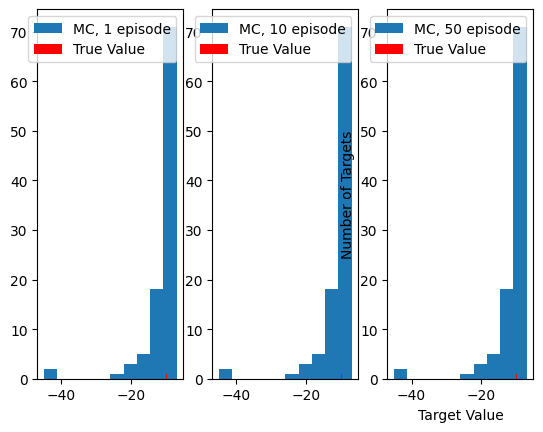

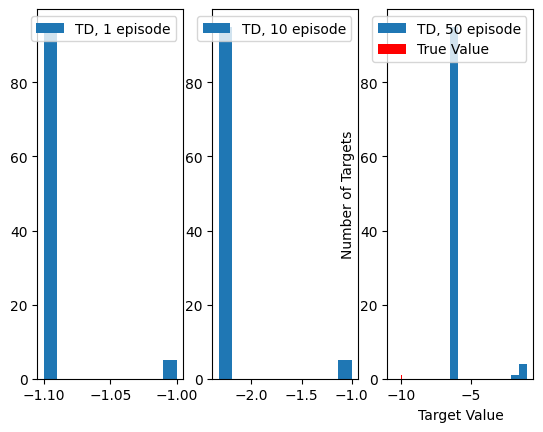

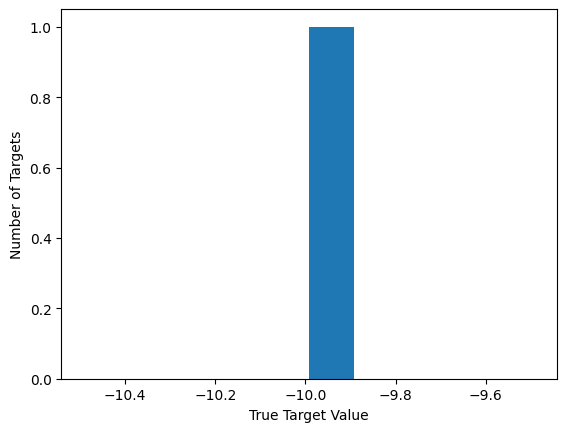

In [12]:
""" Please code your implementation of plotting the histogram figure here """

fig, ax = plt.subplots(1,3)
ax[0].hist(MCTarget1)
ax[0].hist(TargetTrueVal, color = 'r')
ax[1].hist(MCTarget10)
ax[1].hist(TargetTrueVal, color = 'r')
ax[2].hist(MCTarget50)
ax[2].hist(TargetTrueVal, color = 'r')
plt.xlabel("Target Value")
plt.ylabel("Number of Targets")
ax[0].legend(['MC, 1 episode', 'True Value'])
ax[1].legend(['MC, 10 episode', 'True Value'])
ax[2].legend(['MC, 50 episode', 'True Value'])
plt.show()

fig, ax = plt.subplots(1,3)
ax[0].hist(TDTarget1)
ax[1].hist(TDTarget10)
ax[2].hist(TDTarget50)
ax[2].hist(TargetTrueVal, color = 'r')
plt.xlabel("Target Value")
plt.ylabel("Number of Targets")
ax[0].legend(['TD, 1 episode'])
ax[1].legend(['TD, 10 episode'])
ax[2].legend(['TD, 50 episode', 'True Value'])
plt.show()

fig, ax = plt.subplots()
ax.hist(TargetTrueVal)
plt.xlabel("True Target Value")
plt.ylabel("Number of Targets")
plt.show()

